In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [5]:
dataset = pd.read_csv('placementdata.csv')

In [6]:
dataset

,RegNo.,Quants,LogicalReasoning,Verbal,Programming,CGPA,Networking,CloudComp,WebServices,DataAnalytics,QualityAssurance,AI,Placed
0,T150054001,11,11,10,11,10.00,4.3,6.2,7.4,8.3,8.1,5.0,1
1,T150054002,8,10,11,18,8.80,4.9,5.6,7.3,8.8,8.3,9.4,1
2,T150054003,11,11,10,8,9.63,3.4,6.6,7.5,8.0,8.0,5.4,1
3,T150054004,14,13,8,8,6.55,4.5,6.5,6.9,3.3,4.1,4.6,0
4,T150054005,10,7,7,10,7.27,3.1,5.6,6.7,4.6,2.7,4.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,T150054326,22,25,24,23,9.35,8.4,9.4,8.8,8.9,9.1,8.4,0
326,T150054327,25,23,21,22,8.51,8.7,8.8,9.4,8.0,7.6,8.0,0
327,T150054328,21,23,24,25,8.82,7.8,9.3,9.0,8.6,8.1,8.7,0
328,T150054329,22,25,24,21,8.59,7.9,9.4,9.1,9.0,8.3,8.8,1


In [7]:
dataset.drop(['RegNo.'], axis=1, inplace=True)

In [8]:
dataset.isnull().sum()

Quants              0
LogicalReasoning    0
Verbal              0
Programming         0
CGPA                0
Networking          0
CloudComp           0
WebServices         0
DataAnalytics       0
QualityAssurance    0
AI                  0
Placed              0
dtype: int64

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Quants            330 non-null    int64  
 1   LogicalReasoning  330 non-null    int64  
 2   Verbal            330 non-null    int64  
 3   Programming       330 non-null    int64  
 4   CGPA              330 non-null    float64
 5   Networking        330 non-null    float64
 6   CloudComp         330 non-null    float64
 7   WebServices       330 non-null    float64
 8   DataAnalytics     330 non-null    float64
 9   QualityAssurance  330 non-null    float64
 10  AI                330 non-null    float64
 11  Placed            330 non-null    int64  
dtypes: float64(7), int64(5)
memory usage: 31.1 KB


In [10]:
dataset.describe()

,Quants,LogicalReasoning,Verbal,Programming,CGPA,Networking,CloudComp,WebServices,DataAnalytics,QualityAssurance,AI,Placed
count,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.00000,330.000000,330.000000,330.000000,330.000000
mean,15.830303,15.981818,15.872727,15.957576,8.004727,6.219697,7.716364,7.79303,6.483030,6.395455,6.657576,0.396970
std,4.266394,4.445513,4.353196,4.151905,0.645918,1.614319,0.925675,0.88845,1.497845,1.708875,1.317091,0.490013
min,7.000000,7.000000,7.000000,7.000000,6.520000,2.500000,5.500000,5.50000,2.500000,1.800000,4.300000,0.000000
25%,14.000000,14.000000,14.000000,14.000000,7.590000,5.500000,7.500000,7.50000,5.700000,5.700000,5.700000,0.000000
50%,16.000000,16.000000,16.000000,16.000000,8.035000,6.500000,8.000000,7.90000,6.700000,6.600000,6.600000,0.000000
75%,19.000000,19.000000,19.000000,19.000000,8.400000,7.300000,8.300000,8.30000,7.400000,7.400000,7.400000,1.000000
max,25.000000,25.000000,25.000000,25.000000,10.000000,9.400000,9.500000,9.50000,9.400000,9.500000,9.800000,1.000000


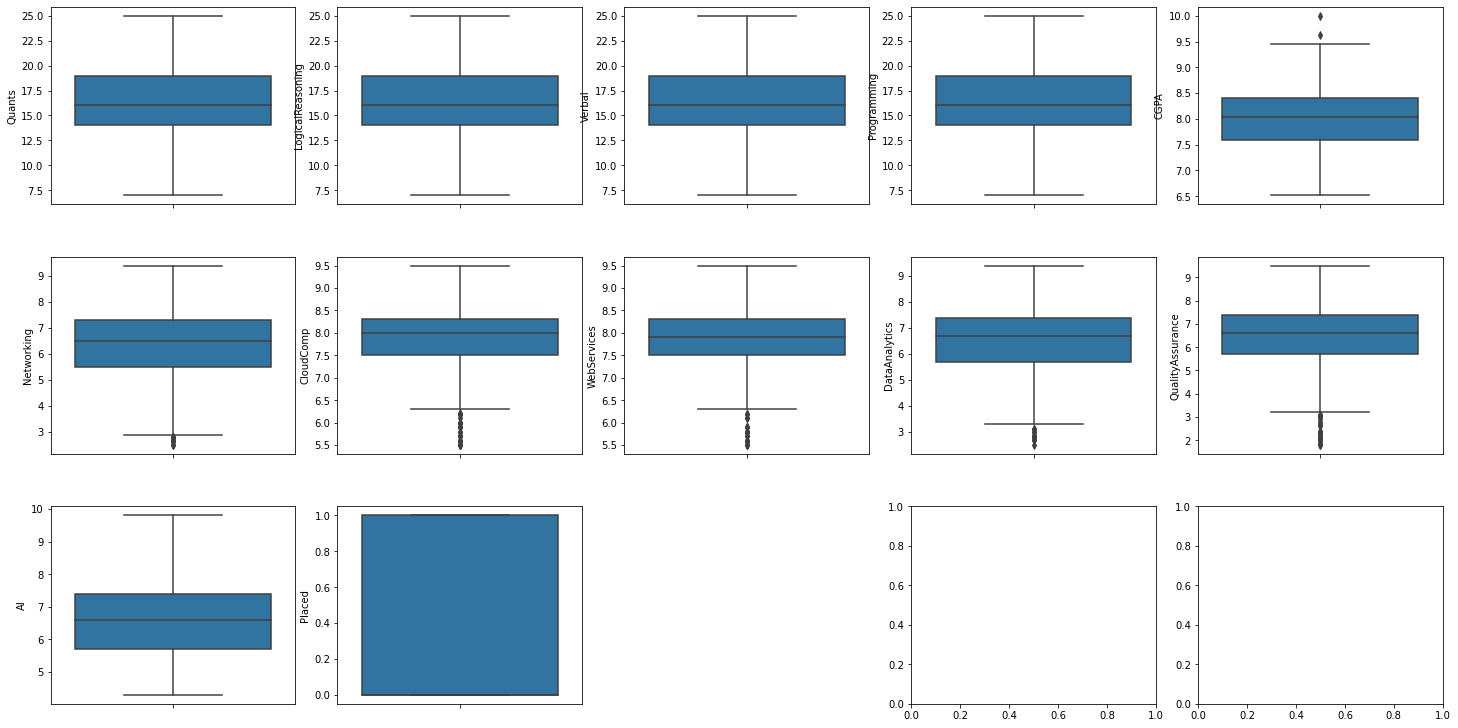

In [18]:
fig, axs = plt.subplots(ncols=5,nrows=3,figsize=(20,10))
index = 0
axs = axs.flatten()
for k,v in dataset.items():
    sns.boxplot(y=v, ax=axs[index])
    index+=1

fig.delaxes(axs[index])
plt.tight_layout(pad=0.3, w_pad=0.5,h_pad = 4.5) 

# Checking for Correlation

In [20]:
dataset.corr()

,Quants,LogicalReasoning,Verbal,Programming,CGPA,Networking,CloudComp,WebServices,DataAnalytics,QualityAssurance,AI,Placed
Quants,1.000000,0.748405,0.805990,0.752021,0.474638,0.693139,0.758718,0.682248,0.543202,0.528441,0.482345,0.048314
LogicalReasoning,0.748405,1.000000,0.755510,0.744631,0.519262,0.736965,0.766765,0.680423,0.533297,0.522964,0.507669,0.027044
Verbal,0.805990,0.755510,1.000000,0.767733,0.504806,0.730020,0.785054,0.697171,0.521387,0.522670,0.502570,0.032307
Programming,0.752021,0.744631,0.767733,1.000000,0.520222,0.695960,0.749044,0.687542,0.511364,0.529086,0.482296,0.017267
CGPA,0.474638,0.519262,0.504806,0.520222,1.000000,0.531203,0.492808,0.579575,0.729659,0.772983,0.635752,0.296556
Networking,0.693139,0.736965,0.730020,0.695960,0.531203,1.000000,0.811543,0.692115,0.588520,0.573346,0.536947,0.180671
CloudComp,0.758718,0.766765,0.785054,0.749044,0.492808,0.811543,1.000000,0.709259,0.559517,0.562963,0.530841,0.104243
WebServices,0.682248,0.680423,0.697171,0.687542,0.579575,0.692115,0.709259,1.000000,0.656801,0.650544,0.614081,0.185805
DataAnalytics,0.543202,0.533297,0.521387,0.511364,0.729659,0.588520,0.559517,0.656801,1.000000,0.813775,0.707360,0.342990
QualityAssurance,0.528441,0.522964,0.522670,0.529086,0.772983,0.573346,0.562963,0.650544,0.813775,1.000000,0.704173,0.358974


<AxesSubplot:>

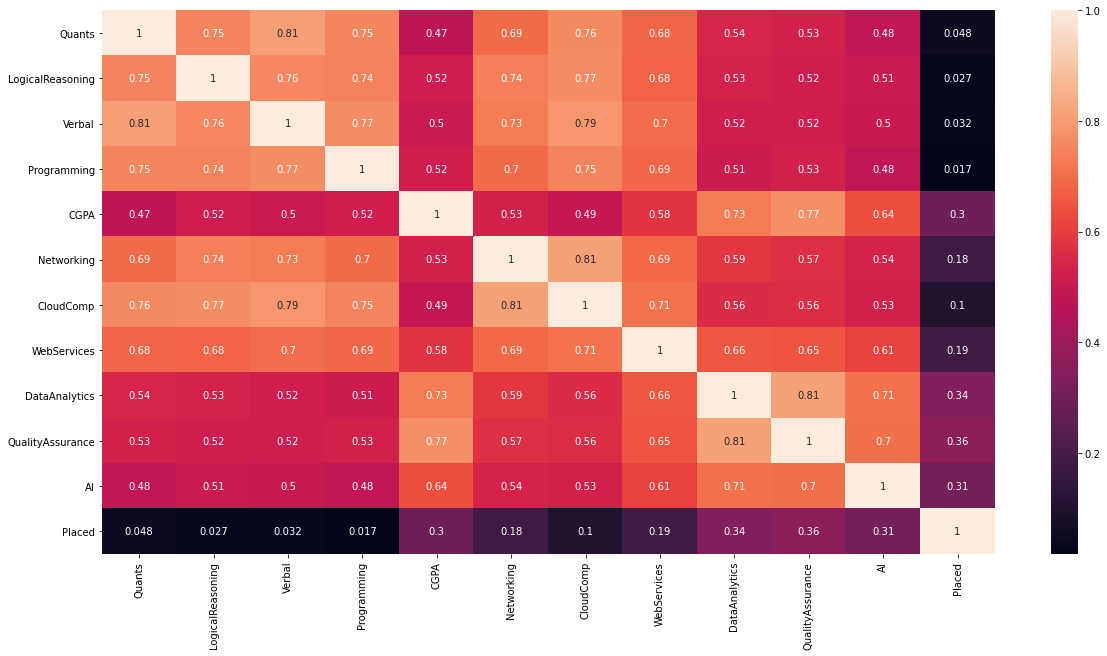

In [21]:
plt.figure(figsize=(20,10))
sns.heatmap(dataset.corr().abs(), annot=True)

In [22]:
x = dataset.loc[:,dataset.columns!='Placed'] # all features are used
# x = x.drop('salary', axis=1)
y = dataset.loc[:, 'Placed'] # label is status of placement

In [24]:
x

,Quants,LogicalReasoning,Verbal,Programming,CGPA,Networking,CloudComp,WebServices,DataAnalytics,QualityAssurance,AI
0,11,11,10,11,10.00,4.3,6.2,7.4,8.3,8.1,5.0
1,8,10,11,18,8.80,4.9,5.6,7.3,8.8,8.3,9.4
2,11,11,10,8,9.63,3.4,6.6,7.5,8.0,8.0,5.4
3,14,13,8,8,6.55,4.5,6.5,6.9,3.3,4.1,4.6
4,10,7,7,10,7.27,3.1,5.6,6.7,4.6,2.7,4.4
...,...,...,...,...,...,...,...,...,...,...,...
325,22,25,24,23,9.35,8.4,9.4,8.8,8.9,9.1,8.4
326,25,23,21,22,8.51,8.7,8.8,9.4,8.0,7.6,8.0
327,21,23,24,25,8.82,7.8,9.3,9.0,8.6,8.1,8.7
328,22,25,24,21,8.59,7.9,9.4,9.1,9.0,8.3,8.8


In [26]:
y

0      1
1      1
2      1
3      0
4      0
      ..
325    0
326    0
327    0
328    1
329    1
Name: Placed, Length: 330, dtype: int64

In [27]:
sc= StandardScaler()
x_scaled = sc.fit_transform(x) 
x_scaled = pd.DataFrame(x_scaled)

In [28]:
x_train,x_test, y_train, y_test = train_test_split(x_scaled,y,test_size=0.18, random_state=0)

In [29]:
lr = LogisticRegression()

In [30]:
lr.fit(x_train, y_train)

LogisticRegression()

In [31]:
y_pred = lr.predict(x_test)

In [32]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1], dtype=int64)

In [33]:
y_test

122    0
66     0
142    1
246    0
146    1
63     1
269    1
15     0
136    0
144    0
268    0
59     0
26     0
68     0
213    1
250    1
157    0
108    0
60     1
212    0
210    0
233    1
170    0
296    0
221    0
300    1
308    0
220    1
278    0
171    1
189    0
239    0
218    0
7      0
6      1
56     1
55     0
22     0
120    0
64     0
264    0
21     1
134    1
263    0
12     1
223    0
158    0
168    1
102    1
116    1
17     0
140    1
76     1
248    1
100    0
191    1
293    0
65     0
81     0
309    0
Name: Placed, dtype: int64

In [34]:
accuracy_score(y_test, y_pred)

0.6333333333333333

In [35]:
lr.score(x_train,y_train)

0.7185185185185186

In [36]:
confusion_matrix(y_test, y_pred)

array([[28,  9],
       [13, 10]], dtype=int64)

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.76      0.72        37
           1       0.53      0.43      0.48        23

    accuracy                           0.63        60
   macro avg       0.60      0.60      0.60        60
weighted avg       0.62      0.63      0.63        60

